In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#linear Regrassion Imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

#Randon Forest Regressor Imports

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/Housing.csv")

# Review the DataFrame
df_lending_data = pd.read_csv(file_path)

df_lending_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [3]:
# Perform mean imputation for numerical columns with missing values
numerical_columns_with_missing = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for col in numerical_columns_with_missing:
    mean_value = df_lending_data[col].mean()
    df_lending_data[col].fillna(mean_value, inplace=True)

In [4]:
# Separate features and target
X = df_lending_data.drop(columns=['median_house_value'])
y = df_lending_data['median_house_value']

In [5]:
#Define categorical columns
categorical_columns = ['ocean_proximity']

# Define numerical columns
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [6]:
# Create transformers for preprocessing
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# One-hot encoding to categorical features
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Create a ColumnTransformer to apply transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ],
    remainder='passthrough'
)


In [7]:
# Create a LinearRegression model
model = LinearRegression()

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model's performance
if r_squared >= 0.80:
    print("The model demonstrates meaningful predictive power.")
    print("R-squared:", r_squared)
    print("mse:", mse)
else:
    print("The model does not meet the performance threshold.")
    print("R-squared:", r_squared)
    print("mse:", mse)

The model does not meet the performance threshold.
R-squared: 0.6258771951358701
mse: 4902538824.586241


In [8]:
#Code block to test Random Forest Regressor Model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can change the imputation strategy
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)





R-squared: 0.8173290384570426
Mean Squared Error: 2393736680.697894


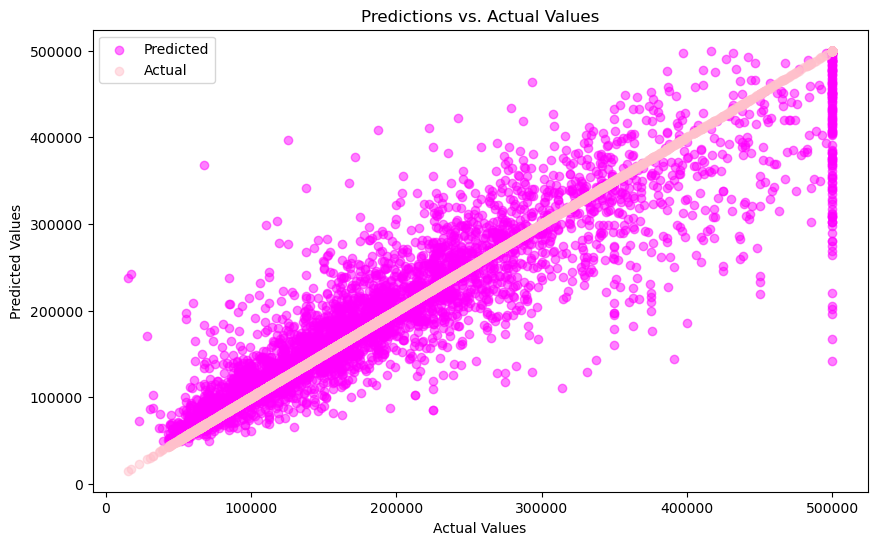

In [12]:
import matplotlib.pyplot as plt


# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Create a scatter plot to visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='magenta', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='pink', label='Actual', alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

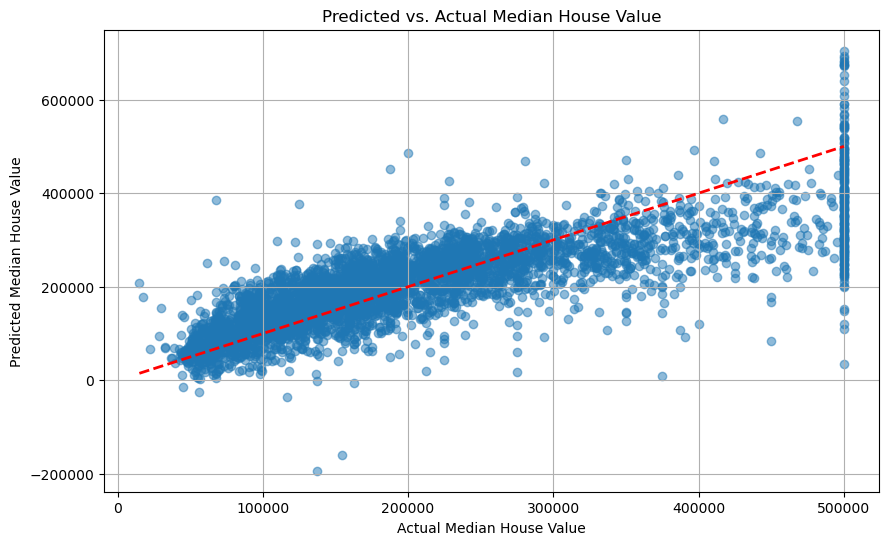

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions using the trained pipeline
y_pred = pipeline.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs. Actual Median House Value")
plt.grid(True)

# Add a line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.show()


In [ ]:
#Scale the Data 
#df_lending_data_scaled = StandardScaler().fit_transform(df_lending_data)

#print(df_lending_data_scaled[:5])


from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_lending_data.drop(columns=['median_house_value'])
y = df_lending_data['median_house_value']

# One-hot encoding to categorical features
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Print the scaled data for the first 5 rows
print(X_scaled[:5])


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
list = df_lending_data["ocean_proximity"].unique()
list

In [ ]:


# Define categorical columns (replace with your actual categorical columns)
categorical_columns = ['ocean_proximity']

# Define numerical columns (replace with your actual numerical columns)
numerical_columns = ['numerical_feature_1', 'numerical_feature_2', ...]

# Create transformers for preprocessing
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Create a ColumnTransformer to apply transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ],
    remainder='passthrough'  # This includes other columns not specified
)

# Create a LinearRegression model
model = LinearRegression()

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Evaluate the model's performance
if r_squared >= 0.80:
    print("The model demonstrates meaningful predictive power.")
    print("R-squared:", r_squared)
else:
    print("The model does not meet the performance threshold.")
    print("R-squared:", r_squared)




In [ ]:
# Define your features and target variable
features = df_lending_data.drop(columns=['median_house_value'])  # Replace with your actual feature columns
target = df_lending_data['median_house_value']  # Replace with your actual target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

In [ ]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test_encoded)

# Calculate balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search through
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization solver
}

# Initialize the Logistic Regression model
model = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train_encoded, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_encoded, y_train)

# Use the best model to make predictions on the testing data
y_pred_best = best_model.predict(X_test_encoded)

# Evaluate the best model's performance
best_balanced_acc = balanced_accuracy_score(y_test, y_pred_best)
best_conf_matrix = confusion_matrix(y_test, y_pred_best)
best_class_report = classification_report(y_test, y_pred_best)

# Print evaluation metrics for the best model
print("Best Balanced Accuracy:", best_balanced_acc)
print("Best Confusion Matrix:\n", best_conf_matrix)
print("Best Classification Report:\n", best_class_report)


In [ ]:
# Print original model's performance
print("Original Model:")
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("\n")

# Print best model's performance
print("Best Model (After Optimization):")
print("Best Balanced Accuracy:", best_balanced_acc)
print("Best Confusion Matrix:\n", best_conf_matrix)
print("Best Classification Report:\n", best_class_report)
print("\n")

# Compare performance improvement
improvement_balanced_acc = best_balanced_acc - balanced_acc
print("Performance Improvement in Balanced Accuracy:", improvement_balanced_acc)


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [ ]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_lending_data['loan_status']

# Separate the X variable, the features
x = df_lending_data.drop(columns=['loan_status'])

In [ ]:
# Review the y variable Series
y

In [ ]:
# Review the X variable DataFrame
x

### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [ ]:
# Check the balance of our target values
y.value_counts()


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the model using training data
# YOUR CODE HERE!



# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistics_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistics_regression_model.fit(X_train, y_train)


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [ ]:
# Make a prediction using the testing data
training_predictions = lr_model.predict(X_train)
testing_predictions = logistics_regression_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import balanced_accuracy_score

# Calculate and print the balanced_accuracy score of the model
balanced_acc_train = balanced_accuracy_score(y_train, training_predictions)
balanced_acc_test = balanced_accuracy_score(y_test, testing_predictions)

print("Balanced Accuracy Score (Training):", balanced_acc_train)
print("Balanced Accuracy Score (Testing):", balanced_acc_test)


In [ ]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

training_matrix = confusion_matrix(y_train, training_predictions)

print(training_matrix)

In [ ]:
# Print the classification report for the model
training_report = classification_report(y_train, training_predictions)

print(training_report)

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [ ]:
# Import the RandomOverSampler module form imbalanced-learn

from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# Assign a random_state parameter of 1 to the model
oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
x_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)




In [ ]:
# Count the distinct values of the resampled labels data
distinct_label_counts = y_resampled.value_counts()

print(distinct_label_counts)


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model_resampled = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
lr_model_resampled.fit(x_resampled, y_resampled)

# Make a prediction using the testing data
testing_predictions_resampled = lr_model_resampled.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model 
from sklearn.metrics import balanced_accuracy_score

# Calculate the balanced accuracy score for the resampled model
balanced_acc_resampled = balanced_accuracy_score(y_test, testing_predictions_resampled)

print("Balanced Accuracy Score (Resampled Model):", balanced_acc_resampled)


In [ ]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the resampled model
confusion_matrix_resampled = confusion_matrix(y_test, testing_predictions_resampled)

print("Confusion Matrix (Resampled Model):")
print(confusion_matrix_resampled)


In [ ]:
# Print the classification report for the model
from sklearn.metrics import classification_report

# Generate the classification report for the resampled model
classification_report_resampled = classification_report(y_test, testing_predictions_resampled)

print("Classification Report (Resampled Model):")
print(classification_report_resampled)


### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!